In [1]:
import numpy as np
from numpy import *
from mayavi import mlab
# mlab.init_notebook(backend='png')
mlab.init_notebook(backend='png')

Notebook initialized with png backend.


## Mayavi2 绘图

`mlab.surf` 函数使用规律间隔的高度数据的二维数组绘制曲面，参数包括：
- `*args` 可以有多种形式：
  - s：高程矩阵（elevation matrix），二维数组
  - x, y, s：x、y 可以是一维或二维数组，s 也是一个数组
  - x, y, f：f 是可调用的函数
- `color`：VTK 对象的颜色，制定时覆盖颜色图，浮点数三元组
- `colormap`：使用的颜色图类型
- `extent`：创建对象的范围：\[xmin, xmax, ymin, ymax, zmin, zmax\]，默认为 x、y、z 数组的范围
- `figure`：要填充的图
- `line_width`：线的宽度（如果有），浮点数，默认为 2.0
- `mask`：boolean 掩码数组，一直某些数据点（此方法基于标量的颜色映射，如果使用 `color` 关键字指定纯色，则此方法将无效）
- `name`：创建的 VTK 对象的名称
- `opacity`：VTK对象征途的不透明度，浮点数，默认为 1.0
- `representation`：surface 的展示类型，可以是 `surface`、`wireframe`、`points`，默认为 `surface`
- `reset_zoom`：重置缩放以适应数据，默认为 `True`
- `transparent`：使对象的透明度随量变化
- `vmax`/`vmin`：缩放颜色图
- `wrap_scale`：z 轴的比例

`mlab.axes` 函数用于为当前对象创建轴，参数包括：
- `color`, `extent`, `figure`, `line_width`, `name`, `opacity`
- `nb_labels`：每个方向上的标签数，默认为 2
- `ranges`：在轴上显示的标签范围，\[xmin, xmax, ymin, ymax, zmin, zmax\]，默认值为对象的范围
- `x_axis_visibility`/`y_axis_visibility`/`z_axis_visibility`：轴可见性，boolean
- `xlabel`/`ylabel`/`zlabel`：轴标签

`mlab.outline` 函数用于为当前对象创建轮廓，参数包括：
- `color`, `extent`, `figure`, `line_width`, `name`, `opacity`


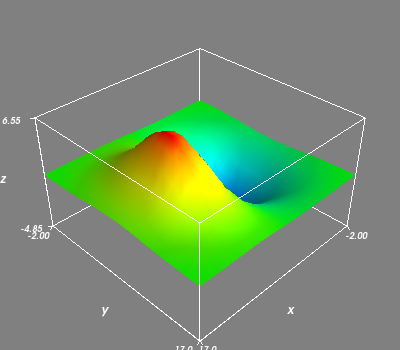

In [2]:
mlab.clf()
x, y = np.ogrid[-2:2:20j, -2:2:20j]
z = x*np.exp(-x**2-y**2)

pl = mlab.surf(x, y, z, warp_scale='auto')
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.outline(pl)

`mlab.mesh` 函数可以绘制更复杂的三位曲面其使用网格间距数据（grid-spaced data）的二维数组绘制表面，参数包括：
- x, y, z：为形状相同的二维数组，给出曲面顶点的位置，点之间的连通性由数组之间连通性决定
- `color`, `colormap`, `extent`, `figure`, `line_width`, `mask`
- `mask_points`：如果提供，则 `mask_points` 中的数据点仅显示一个。这对于减少大型数据集上显示的点数很有用。必须为整数或 `None`。
- `mode`：图形的模式，可以为 `2darrow`，`2dcircle`，`2dcross`，`2ddash`，`2ddiamond`，`2dhooked_arrow`，`2dsquare`，`2dthick_arrow`，`2dthick_cross`，`2dtriangle`，`2dvertex`，`arrow`，`axes`，`cone`，`cube`，`cylinder`，`point`，`sphere`，默认为 `sphere`
- `name`, `opacity`
- `representation`：曲面的表现形式，可以为 `surface`, `wireframe`, `points`, `mesh`, `fancymesh`，默认为 `surface`
- `reset_zoom`
- `resolution`：创建图形的分辨率征税，默认为 8
- `scalars`：可选的 scalar 数据
- `scale_factor`：在 `fancymesh` 模式下，表示顶点的图形的比例因子，浮点数，默认为 0.05
- `scale_mode`：图形的缩放模式，可以为 `vector`, `scalar`, `none`
- `transparent`
- `tube_radius`：`mesh` 模式下表示线的管的半径，`None` 表示简单的线
- `tube_sides`：表示线的管的侧面数，整数，默认为 6
- `vmax`, `vmin`


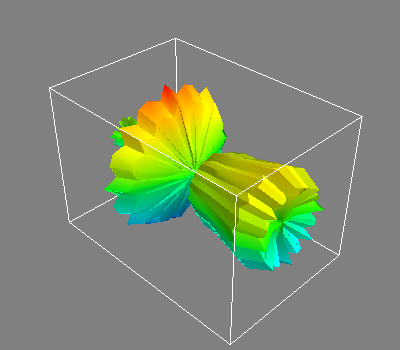

In [3]:
mlab.clf()
dphi, dtheta = pi/20.0, pi/20.0
[phi, theta] = mgrid[0:pi+dphi*1.5:dphi, 0:2*pi+dtheta*1.5:dtheta]
m0 = 4
m1 = 3
m2 = 2
m3 = 3
m4 = 6
m5 = 2
m6 = 6
m7 = 4
r = sin(m0*phi)**m1+cos(m2*phi)**m3+sin(m4*theta)**m5+cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

s = mlab.mesh(x, y, z, representation='surface')

# mlab.show()
mlab.outline(s)


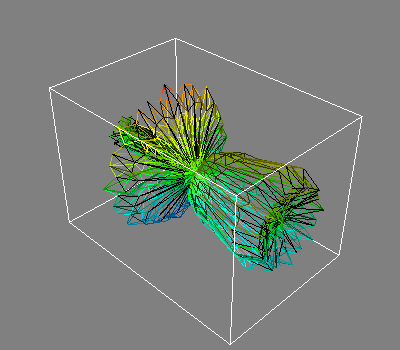

In [4]:
mlab.clf()

s = mlab.mesh(x, y, z, representation='wireframe', line_width=1.0)

# mlab.show()
mlab.outline(s)

`mlab.plot3d` 函数用于在给定的两点之间画线，参数包括：
- `*args`：x, y, z 以及一个可选的 s，他们都是形状相同的 numpy 数组或列表， x, y, z 给出线的连续点的位置，s 是可选的与每个点关联的标量值
- `color`, `colormap`, `extent`, `figure`, `line_width`, `name`, `opacity`, `representation`, `reset_zoom`, `transparent`, `tube_radius`, `tube_sides`, `vmax`, `vmin`

`representation` 可以取 `surface`, `wireframe`, `points`


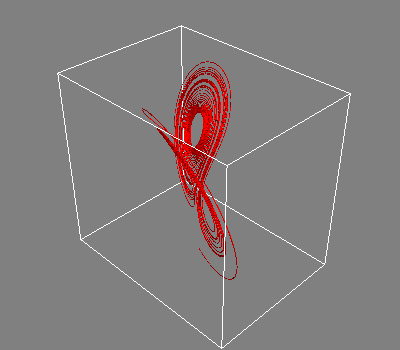

In [5]:
from scipy.integrate import odeint

mlab.clf()

def lorenz(w, t, p, r, b):
    x, y, z = w
    return np.array([p*(y-x), x*(r-z)-y, x*y-b*z])

t = np.arange(0, 30, 0.01)
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))


l = mlab.plot3d(track1[:, 0], track1[:, 1], track1[:, 2],
                color=(1, 0, 0), tube_radius=0.1)


mlab.outline(l)

`mlab.imshow` 函数以一个图形的形式查看二维数组，参数包括：
- z：一个二维数组，值即映射为颜色
- `color`, `colormap`, `extent`, `figure`
- `interpolate`：是否要对图像中的像素进行插值。默认为 `True`
- `line_width`, `name`, `opacity`, `reset_zoom`, `vmax`, `vmin`


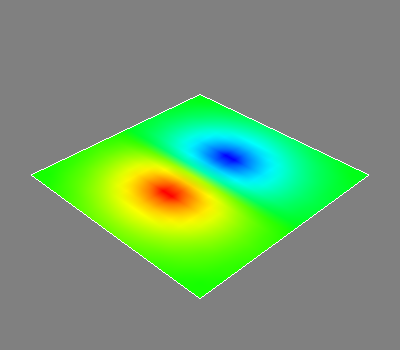

In [6]:
mlab.clf()
x, y = np.ogrid[-2:2:20j, -2:2:20j]
z = x*np.exp(-x**2-y**2)
p = mlab.imshow(z)
mlab.outline(p)

`mlab.contour_surf` 函数使用网格间距数据（grid-spaced data）的二维数组绘制登高图，参数包括：
- `*args`：与 `mlab.surf` 基本相同
- `color`, `colormap`
- `contours`：指定等高线的数量/列表
- `extent`, `figure`, `line_width`, `name`, `opacity`, `reset_zoom`, `transparent`, `vmax`, `vmin`, `wrap_scale`


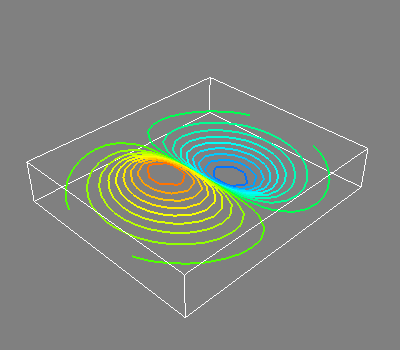

In [7]:
mlab.clf()
x, y = np.ogrid[-2:2:20j, -2:2:20j]
z = x*np.exp(-x**2-y**2)
p = mlab.contour_surf(x, y, z, contours=20)
mlab.outline(p)